# This is the method that will work in this code.


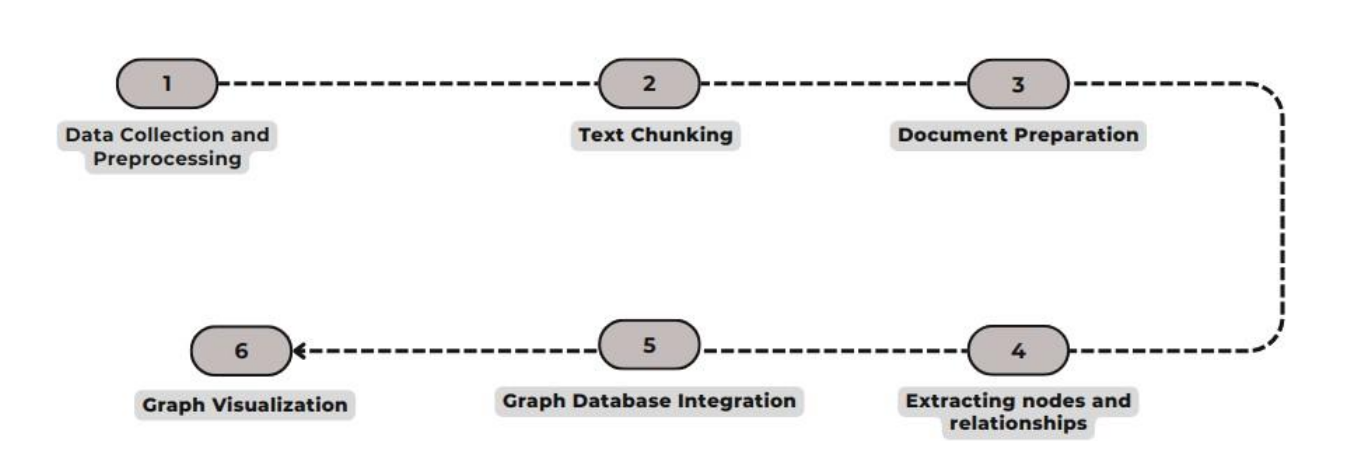

# Install all required libraries

In [4]:
%pip install bs4

  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import re
import base64
import requests
import pandas as pd
import pdfplumber
from getpass import getpass
from bs4 import BeautifulSoup
from fpdf import FPDF

# Web Scraping

ALL DATA I USED FROM WEBSITES

13 TRAMVAY
 https://fr.wikipedia.org/w/index.php?title=Ligne_13_du_tramway_de_Gen%C3%A8ve&oldid=210179936

14 TRAMVAY
 https://fr.wikipedia.org/w/index.php?title=Ligne_14_du_tramway_de_Gen%C3%A8ve&oldid=210870298

15 TRAMVAY
 https://fr.wikipedia.org/w/index.php?title=Ligne_15_du_tramway_de_Gen%C3%A8ve&oldid=211900528

17 TRAMVAY
 https://fr.wikipedia.org/w/index.php?title=Ligne_17_du_tramway_de_Gen%C3%A8ve&oldid=210212545

18 TRAMVAY
 https://fr.wikipedia.org/w/index.php?title=Ligne_18_du_tramway_de_Gen%C3%A8ve&oldid=211392161

20 minutes. "Extension du tram 15: Maudet répond aux craintes des frontaliers." 20 Minutes, Apr. 2024
 https://www.20min.ch/fr/story/genevefrance-voisine-extension-du-tram-15-maudet-repond-aux-craintes-des-frontaliers-103092778

[68] Léman bleu tv. "L'extension du tram 15 inaugurée." Dec. 2023
 https://www.lemanbleu.ch/fr/Actualites/Geneve/L-extension-du-tram-15-inauguree.html

[87] Pays de Gex agglo. "Prolongement du tramway à Ferney-Voltaire depuis Genève.
 https://www.paysdegexagglo.fr/ficheaction/96/8834-prolongement-du-tramway-a-ferney-voltaire-depuis-geneve.htm

[60] Le Tram Piétonnisation - Annemasse. "Info travaux
 https://www.tram-pietonnisation.fr/info-travaux/

In [7]:
# Change your url acording to url will use
url = "https://www.tram-pietonnisation.fr/info-travaux/"
response = requests.get(url)


soup = BeautifulSoup(response.text, 'html.parser')
tags = ['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'p', 'table', 'ul', 'ol']

    # Variable to store all extracted text
all_text = ""
elements = soup.find_all(tags)

for element in elements:
      if element.name in ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']:
          all_text += f"{element.text.strip()}\n"
      elif element.name == 'p':
          all_text += f"{element.text.strip()}\n"
          for li in element.find_all('li'):
               all_text += f"- {li.text.strip()}\n"
      elif element.name == 'table':
          rows = element.find_all('tr')
          for row in rows:
              cells = row.find_all(['th', 'td'])
              all_text += "\t".join(cell.text.strip() for cell in cells) + "\n"

print(all_text)

Info travaux
Sélectionnez votre secteur sur la carte pour voir les travaux proches de chez vous
Bétonnage rue René Blanc : accès aux parking temporairement fermé
Ce qu’il faut savoir
À partir du lundi 10 mars 2025, des travaux importants de bétonnage seront réalisés sur la partie nord de la rue René Blanc, incluant le croisement avec la rue Paul Bert.
Impact principal : L’accès au parking du n°3 rue René Blanc ne sera plus possible à partir du 10 mars au matin (veuillez prévoir de quitter le parking avant 7h) et ce jusqu’à début avril, après le temps de séchage nécessaire du béton désactivé.
Solution pour les riverains concernés
Pour faciliter cette période de transition, la Ville d’Annemasse met à disposition des places de stationnement temporaires au parking Montessuit pour les résidents du n°3 rue René Blanc.
Comment obtenir votre accès temporaire ?
Pour bénéficier de ces droits d’accès, nous vous invitons à :
Important : Il faut compter un minimum de 4 jours pour l’obtention d’un b

In [10]:
import requests
from bs4 import BeautifulSoup
from fpdf import FPDF

# Change your URL accordingly
url = "https://www.tram-pietonnisation.fr/info-travaux/"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    tags = ['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'p', 'table', 'ul', 'ol']

    all_text = ""
    elements = soup.find_all(tags)

    for element in elements:
        if element.name in ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']:
            all_text += f"\n{element.text.strip()}\n"
        elif element.name == 'p':
            all_text += f"{element.text.strip()}\n"
            for li in element.find_all('li'):
                all_text += f"- {li.text.strip()}\n"
        elif element.name == 'table':
            rows = element.find_all('tr')
            for row in rows:
                cells = row.find_all(['th', 'td'])
                all_text += "\t".join(cell.text.strip() for cell in cells) + "\n"

    # Keep only the first half of the text
    lines = all_text.split("\n")
    half_text = "\n".join(lines[:len(lines) // 2])

    # Create PDF
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()
    pdf.set_font("Arial", "", 12)  # Ensure proper font handling
    
    for line in half_text.split("\n"):
        line = line.encode('latin-1', 'replace').decode('latin-1')  # Fix Unicode characters
        pdf.cell(200, 10, txt=line, ln=True, align='L')
    
    pdf.output("scraped_data.pdf")
    print("PDF saved successfully as 'scraped_data.pdf'")
else:
    print("Failed to retrieve the webpage.")


PDF saved successfully as 'scraped_data.pdf'


In [14]:
%pip install weasyprint



   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 31.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 23.3 MB/s eta 0:00:00


In [16]:
import requests
from bs4 import BeautifulSoup
from fpdf import FPDF

# Wikipedia pages to scrape
wiki_pages = {
    "Ligne 13": "https://fr.wikipedia.org/w/index.php?title=Ligne_13_du_tramway_de_Gen%C3%A8ve&oldid=210179936",
    "Ligne 14": "https://fr.wikipedia.org/w/index.php?title=Ligne_14_du_tramway_de_Gen%C3%A8ve&oldid=210870298",
    "Ligne 17": "https://fr.wikipedia.org/w/index.php?title=Ligne_17_du_tramway_de_Gen%C3%A8ve&oldid=210212545",
    "Ligne 15": "https://fr.wikipedia.org/w/index.php?title=Ligne_15_du_tramway_de_Gen%C3%A8ve&oldid=211900528",
    "Ligne 18": "https://fr.wikipedia.org/w/index.php?title=Ligne_18_du_tramway_de_Gen%C3%A8ve&oldid=211392161"
}

# Initialize PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Tags to extract
tags = ['h1', 'h2', 'h3', 'h4', 'p', 'ul', 'ol', 'table']

for title, url in wiki_pages.items():
    print(f"Scraping {title}...")
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        content_div = soup.find('div', {'class': 'mw-parser-output'})

        # Clean up references and edit sections
        for el in content_div.select(".mw-editsection, .reference"):
            el.decompose()

        # Write section title
        pdf.set_font("Arial", 'B', 14)
        pdf.cell(200, 10, txt=f"{title}", ln=True)
        pdf.set_font("Arial", size=12)

        elements = content_div.find_all(tags)
        for element in elements:
            text = ""

            if element.name in ['h2', 'h3', 'h4']:
                text = "\n" + element.get_text(strip=True).upper()
            elif element.name == 'p':
                text = element.get_text(strip=True)
            elif element.name in ['ul', 'ol']:
                for li in element.find_all('li'):
                    text += f" - {li.get_text(strip=True)}\n"
            elif element.name == 'table':
                for row in element.find_all('tr'):
                    cells = row.find_all(['th', 'td'])
                    row_text = " | ".join(cell.get_text(strip=True) for cell in cells)
                    text += row_text + "\n"

            # Handle unicode safely for PDF
            for line in text.strip().split("\n"):
                clean_line = line.encode('latin-1', 'replace').decode('latin-1')
                pdf.multi_cell(0, 10, txt=clean_line)
    else:
        print(f"Failed to fetch {title}.")

# Save PDF
pdf.output("Tramway_Geneve_Lignes_13_14_15_17_18.pdf")
print("✅ PDF saved successfully as 'Tramway_Geneve_Lignes_13_14_15_17_18.pdf'")


Scraping Ligne 13...
Scraping Ligne 14...
Scraping Ligne 17...
Scraping Ligne 15...
Scraping Ligne 18...
✅ PDF saved successfully as 'Tramway_Geneve_Lignes_13_14_15_17_18.pdf'


In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from fpdf import FPDF
from io import StringIO

# Wikipedia pages to scrape
wiki_pages = {
    "Ligne 13": "https://fr.wikipedia.org/w/index.php?title=Ligne_13_du_tramway_de_Gen%C3%A8ve&oldid=210179936",
    "Ligne 14": "https://fr.wikipedia.org/w/index.php?title=Ligne_14_du_tramway_de_Gen%C3%A8ve&oldid=210870298",
    "Ligne 17": "https://fr.wikipedia.org/w/index.php?title=Ligne_17_du_tramway_de_Gen%C3%A8ve&oldid=210212545",
    "Ligne 15": "https://fr.wikipedia.org/w/index.php?title=Ligne_15_du_tramway_de_Gen%C3%A8ve&oldid=211900528",
    "Ligne 18": "https://fr.wikipedia.org/w/index.php?title=Ligne_18_du_tramway_de_Gen%C3%A8ve&oldid=211392161"
}

# Functions to extract textual content
def extract_paragraphs(soup):
    paragraphs = [p.get_text(strip=True) for p in soup.find_all("p")]
    return [p for p in paragraphs if p and len(p) > 10]

def extract_tables(soup):
    tables = []
    for table in soup.find_all("table", {"class": "wikitable"}):
        try:
            table_html = StringIO(str(table))
            df = pd.read_html(table_html)[0]
            tables.append(df)
        except Exception as e:
            print(f"⚠️ Failed to parse table: {e}")
    return tables

# Create and fill PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

for title, url in wiki_pages.items():
    print(f"Scraping: {title}...")
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract text
    paragraphs = extract_paragraphs(soup)
    tables = extract_tables(soup)

    # Add section title
    pdf.set_font("Arial", 'B', 14)
    pdf.cell(0, 10, txt=title, ln=True)
    pdf.set_font("Arial", size=12)

    # Add paragraphs
    for para in paragraphs:
        line = para.encode('latin-1', 'replace').decode('latin-1')
        pdf.multi_cell(0, 10, line)
        pdf.ln(1)

    # Add tables
    for df in tables:
        pdf.ln(5)
        for i, row in df.iterrows():
            row_text = " | ".join(str(x) for x in row.values)
            line = row_text.encode('latin-1', 'replace').decode('latin-1')
            pdf.multi_cell(0, 8, line)
        pdf.ln(3)

print("📄 Generating final PDF...")
pdf.output("Tramway_Geneve_Lignes.pdf")
print("✅ PDF saved as 'Tramway_Geneve_Lignes.pdf'")


Scraping: Ligne 13...
Scraping: Ligne 14...
Scraping: Ligne 17...
Scraping: Ligne 15...
Scraping: Ligne 18...
📄 Generating final PDF...
✅ PDF saved as 'Tramway_Geneve_Lignes.pdf'
